Title: Analysis of Resting Blood Pressure (mm Hg) vs. Maximum Heart Rate (BPS) for Classification of Heart disease

For my project proposal, I will be using is a modified version of the UCI Heart Disease dataset. The UCI Heart Disease dataset includes four databases of the countries: Cleveland, Hungary, Switzerland, and the VA Long Beach. I will be using Cleveland for the prediction of heart disease because the dataframe contains sufficient observations. The Heart Disease Cleveland dataframe includes the variables: "trestbps" and "thalach", which I will be using to predict our variable of intrest: "num". In the dataframe, "trestbps" refers to the "resting blood pressure (mm Hg)" on admission to the hospital, while "thalach" refers to "maximum heart rate achieved (bps)", and "num" means the diagnosis of heart disease with a value of: 0 means no heart disease, 1-4 means the levels of heart disease[1] (I can classify levels of heart disease as 1 = Mild, 2 = Moderate, 3 = Severe 4 = Life threatening)[2]. With these resources, I will be answering the question: Can I classify the extent of heart disease using resting blood pressure and maximum heart rate achieved?.

[1]: Source from Piazza question @555

[2]: For the levels of heart disease, I refer to the document https://www.rigshospitalet.dk/afdelinger-og-klinikker/kraeft-og-organsygdomme/blodsygdomme/forskning/forsoegsbehandling/Documents/Lymfomer/Triangle/Triangle-SAE.pdf

Preliminary exploratory data analysis:
1. Demonstrate that the dataset can be read from the web into R 
2. Clean and wrangle your data into a tidy format
3. Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
4. Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

Methods:

The data analysis would be using the "trestbps", "thalach", and "num" columns, which stand for the resting blood pressure (mm Hg), maximum heart rate achieved (BPM), and diagnosis of heart disease. I want to understand what diagnosis of heart disease could be fit with different maximum heart rates and resting blood pressure. The prediction would be measured based on a classification model. Both predictor variables are quantitative for predicting the categorial class. The classification would be done with the application of k nearest neighbor algorithm as it does not require any specific shape assumption for the algorithm to perform well. To visualize the result, a scatter plot would be used with the standardized variables to make sure the classifier would not treat one of the variable to matter more than the other. Each type of chest pain would be labeled with different colors for clear identification.

Expected outcomes and significance:

What do you expect to find?

I expect to find that the highest chest pain would be find in a patient with high maximum heart rate and resting blood pressure.

What impact could such findings have?

The impact of such findings can help us to diagnose the urgency for patients to receive treatment. For example, the max heart rate achieved and the resting bp are within the range of higest chest pain level/type, then the patient should receive acute treatment according to their diagnoses.

What future questions could this lead to?

The two variables we used could have some deviation. They can’t be 100% certain that the heart disease is the correct type. Future question would be is there any other variables I can use to make the prediction more accurately.


In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
# Read data here: 
cleveland_data <- read.table("data/heart_disease/processed.cleveland.data", sep = ",")

# Assign the column names of each column based on the UCI Website:
# https://archive.ics.uci.edu/dataset/45/heart+disease
colnames(cleveland_data) <- c('age','sex','cp','trestbps','chol','fbs', 'restcg', 
                              'thalach','exang','oldpeak','slope','ca','thal','num')

# Mutate the variables so that all of the columns/variables have the correct type
cleveland_clean <- cleveland_data |> mutate(age = as.numeric(age), sex = as_factor(sex), cp = as_factor(cp),
                                            trestbps = as.numeric(trestbps), chol = as.numeric(chol), fbs = as_factor(fbs),
                                            restcg = as_factor(restcg), thalach = as.numeric(thalach), exang = as_factor(exang),
                                            oldpeak = as.numeric(oldpeak), slope = as.numeric(slope), ca = as.numeric(ca),
                                            thal = as_factor(thal), num = as.factor(num)) |>
#change gender/sex into word (male and female) instead of numbers (1 and 0) to make the data more readable to readers
                                     mutate(sex = fct_recode(sex, "male" = "1", "female" = "0"),
#Change the level of heart disease repreting by numbers to a more readable description of the heart disease
                                            num = fct_recode(num, "No heart disease" = "0", "Mild"="1", "Moderate" = "2",
                                                             "Serious" = "3", "Life threatening" = "4"))

cleveland_clean
                             
# Using the values of trestbps + thalach to predict/classify the num of an unknown patient.

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `ca = as.numeric(ca)`.
Caused by warning:
! NAs introduced by coercion”


age,sex,cp,trestbps,chol,fbs,restcg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
63,male,1,145,233,1,2,150,0,2.3,3,0,6.0,No heart disease
67,male,4,160,286,0,2,108,1,1.5,2,3,3.0,Moderate
67,male,4,120,229,0,2,129,1,2.6,2,2,7.0,Mild
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,male,4,130,131,0,0,115,1,1.2,2,1,7.0,Serious
57,female,2,130,236,0,2,174,0,0.0,2,1,3.0,Mild
38,male,3,138,175,0,0,173,0,0.0,1,NA,3.0,No heart disease


In [13]:
set.seed(20)
# Select columns for easier data analysis: trestbps, thalach, num
cleveland_select <- cleveland_clean |> select(trestbps, thalach, num)

# Split the dataset into training set and testing set

cleveland_split <- initial_split(cleveland_select, prop = 0.75, strata = num)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

cleveland_train

trestbps,thalach,num
<dbl>,<dbl>,<fct>
120,129,Mild
140,155,Mild
110,168,Mild
⋮,⋮,⋮
128,130,Serious
164,90,Serious
130,115,Serious


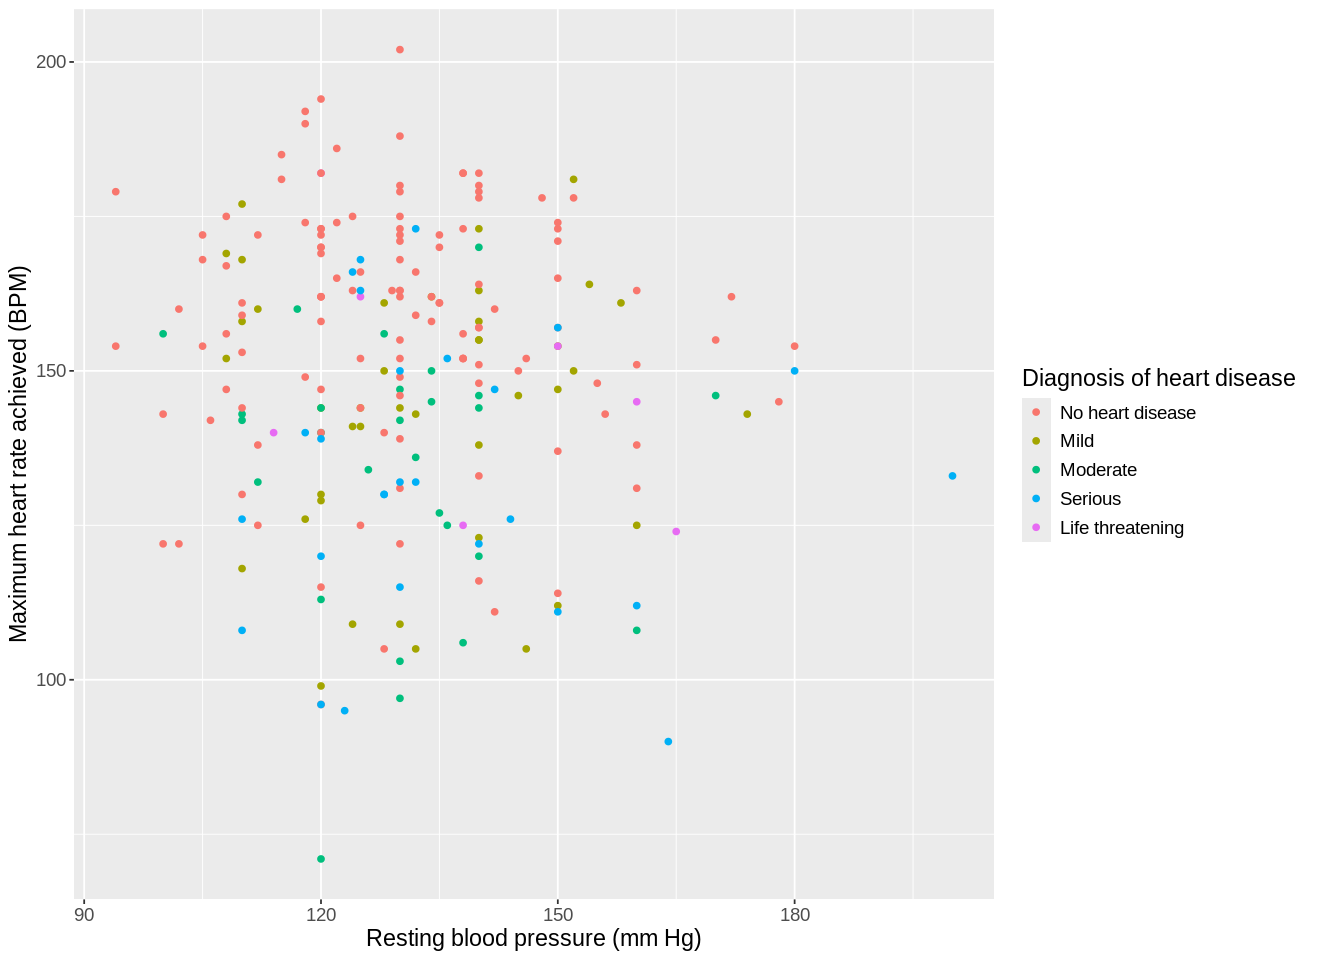

In [14]:
# The unscaled plot with training data here
options(repr.plot.width = 11, repr.plot.height = 8)


cleveland_train_plot <- cleveland_train |>
                        ggplot(aes(x =trestbps , y = thalach , color = num)) +
                        geom_point() +
                        labs(x = "Resting blood pressure (mm Hg)",y = "Maximum heart rate achieved (BPM)", 
                             color = "Diagnosis of heart disease") +
                        theme(text = element_text(size = 14))

cleveland_train_plot